# Neural Computation Exercise 6-1: Pytorch

It is now the time to introduce you [`Pytorch`](https://pytorch.org/features/), which allows implementations of modern, powerful deep learning neural networks in a very simple yet efficient way. 

The question naturally arises as to what Pytorch is?

`Pytorch` is a python-based scientific computing package targeted at two sets of audiences:

* A replacement for Numpy to use the power of GPUs
* A deep learning research platform that provides maximum flexibility and speed

As a start point, we will first introduce some basic examples of Pytorch Tensors can be used. For more details, one may check the official tutorial from [here](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py). We also include how to transfer a tensor between CPU and GPUs.

In addition to the use of GPUs, another very important feature about `Pytorch` is *Automatic Differentiation*, which allows us to numerically evaluate the derivative of a function/model specified by a computer program without any manual gradient calculations. For a more detailed introduction of *Automatic Differentiation* in Pytorch, please read [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py).

# Tensors

The most basic building block of Pytorch is an object called a tensor, which are matrix-like data structures very similar to Numpy's ndarrays with the advantage being that Tensors can also be stored/used on GPUs to accelerate computing. A scalar has zero dimension, so is called 0D tensor. A vector has one dimension (i.e., 1D tensor) , while a matrix has two dimension (2D tensor).
 In this section, we will show you how to create a tensor using Pytorch. First, we need to `import` the package.

In [1]:
import torch 
import numpy as np

You can construct a 3x4 randomly initialised matrix:

In [2]:
x = torch.rand(3,4)
print(x)

tensor([[0.2045, 0.3609, 0.0857, 0.6659],
        [0.8514, 0.2213, 0.9795, 0.3910],
        [0.8986, 0.5472, 0.8465, 0.4717]])


Construct a tensor directly from data (i.e. from a list object) :

In [ ]:
x = torch.tensor([3, 4.5])
print(x)

tensor([3.0000, 4.5000])


You can retrieve the size of the tensor using `size` as follows:

In [ ]:
print(x.size())
# Besides .size(), one may find .shape works as well
print(x.shape)

torch.Size([2])
torch.Size([2])


There are many operations that can be performed on tensors. The addition operation can be done as follows:

In [ ]:
x = torch.rand(3,4)
y = torch.rand(3,4)
print(x+y)

tensor([[1.7933, 0.3334, 0.5948, 1.4624],
        [0.7556, 1.6135, 0.0776, 0.5896],
        [0.7903, 1.6160, 1.3694, 0.5571]])


Or you can use another syntax:

In [ ]:
print(torch.add(x, y))

tensor([[1.7933, 0.3334, 0.5948, 1.4624],
        [0.7556, 1.6135, 0.0776, 0.5896],
        [0.7903, 1.6160, 1.3694, 0.5571]])


You can also provide an output tensor as argument as follows:

In [ ]:
result = torch.empty(3,4)
torch.add(x, y, out=result)
print(result)

tensor([[1.7933, 0.3334, 0.5948, 1.4624],
        [0.7556, 1.6135, 0.0776, 0.5896],
        [0.7903, 1.6160, 1.3694, 0.5571]])


You can also convert a Torch Tensor to a Numpy Array using `numpy()` function.

In [ ]:
x = torch.ones(5)
print(x)
print(x.dtype)

y = x.numpy()
print(y)
print(y.dtype)

tensor([1., 1., 1., 1., 1.])
torch.float32
[1. 1. 1. 1. 1.]
float32


The torch.from_numpy() function can converts a Numpy Array to Torch Tensor. Notice how changing the np array has changed the Torch Tensor automatically. This occurs since the returned ndarray and tensor share the same underlying storage. See how changing an entry in the torch array, y, impacts the np array, x.

In [ ]:
x = np.ones(3)
y = torch.from_numpy(x)

np.add(x, 1, out=x)
print(x)
print(y)



[2. 2. 2.]
tensor([2., 2., 2.], dtype=torch.float64)


In [ ]:
#Use .copy() to only copy the values, and avoid using the same underlying sturcture .
x = np.ones(3)
y = torch.from_numpy(x.copy())

np.add(x, 1, out=x)
print(x)
print(y)

[2. 2. 2.]
tensor([1., 1., 1.], dtype=torch.float64)


Tensors can be moved onto any device using the `.to` method. You can check whether a GPU is available using the `torch.cuda.is_available()` method. The `.to()` method sends your tensor to whatever device you specify, including your CPU (referred to as `cpu`) or your GPUs (referred to as `cuda` or `cuda:0`).

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'  # check whether a GPU is available
y = torch.ones(3,4, device=device)  # directly create a tensor on GPU
x = torch.rand(3,4).to(device)      # or just use .to(device) 
z = x+y
print(z)
print(z.device)

tensor([[1.0537, 1.2964, 1.7960, 1.4172],
        [1.1361, 1.7038, 1.6541, 1.0892],
        [1.7165, 1.3436, 1.5554, 1.2671]], device='cuda:0')
cuda:0


#Autograd


 *Autograd is now a core torch package for automatic differentiation. It uses a tape based system for automatic differentiation.*

*In the forward phase, the autograd tape will remember all the operations which are executed, and in the backward phase, it will replay the operations.*




---



If you set a tensor's attribute `.require_grad` as `True`, it starts to track all operations on it. When you finish your computation you can call `.backward()` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into `.grad` attribute.

The following piece of code creates a tensor and sets `requires_grad=True` to track computation with it.

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Perform a tensor operation:

In [ ]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


 *A `Function` is also an important class for autograd implementation in Pytorch. ``Tensor`` and ``Function`` are interconnected and build up an acyclic
graph, that encodes a complete history of computation. Each tensor has
a ``.grad_fn`` attribute that references a ``Function`` that has created
the ``Tensor`` (except for Tensors created by the user - their
`grad_fn is None`). In the example above, you see that `y` has a `grad_fn` since it was created as a result of an operation.*

We can print the value of that attribute:

In [ ]:
print(y.grad_fn)
print(x.grad_fn)

None


You can do more operations on `y`:

In [ ]:
z = y * y * 2
out = z.mean()

print(z)
print(out)

tensor([[18., 18.],
        [18., 18.]], grad_fn=<MulBackward0>)
tensor(18., grad_fn=<MeanBackward0>)


You can change an existing Tensor's `requires_grad` flag in-place by using `.requires_grad_(...)`. The input flag defaults to `False` if not given. Note that an operation that mutates a tensor in-place is post-fixed with an `_`. For example, `x.copy_(y)` and `x.t_()` will change `x`.

In [ ]:
x = torch.randn(2, 2)
print(x.requires_grad)  # default to False

False


In [ ]:
x.requires_grad_(True)   # change the flag to True
print(x.requires_grad)

True


In [ ]:
y = (x + 1).sum()
print(y.requires_grad)
print(y.grad_fn)

True


Let's backprop now. Consider the following piece of code:

In [ ]:
x = torch.ones(4, 1, requires_grad=True)
y = x + 2
z = y * y * 3
out= z.mean()

In [ ]:
print("1: ", x)
print("2: ", y)
print("3: ", y.grad_fn)
print("4: ", z)
print("5: ", out)

1:  tensor([[1.],
        [1.],
        [1.],
        [1.]], requires_grad=True)
2:  tensor([[3.],
        [3.],
        [3.],
        [3.]], grad_fn=<AddBackward0>)
3:  <AddBackward0 object at 0x7f2838033950>
4:  tensor([[27.],
        [27.],
        [27.],
        [27.]], grad_fn=<MulBackward0>)
5:  tensor(27., grad_fn=<MeanBackward0>)


If you want to compute the derivatives, you can call ``.backward()`` on
a ``Tensor``. If ``Tensor`` is a scalar (i.e. it holds a one element
data), you don’t need to specify any arguments to ``backward()``,
however if it has more elements, you need to specify a ``gradient``
argument that is a tensor of matching shape.

In [ ]:
out.backward()

Since `out` contains a single scalar (i.e., mean), `out.backward()` is equivalent to `out.backward(torch.tensor(1.))`.  You can retrieve the gradient of d(out)/dx as follows:

In [ ]:
print(x.grad)

tensor([[4.5000],
        [4.5000],
        [4.5000],
        [4.5000]])


You should have got a vector containing 4 entries ``4.5``. Let’s call the ``out``
*Tensor* “$o$”.
We have that $o = \frac{1}{4}\sum_i z_i$,
$z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$.
Therefore,
$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence
$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.
In the above function every entry of $x$ has the same function applied hence every entry in the gradient vector is the same (4.5), this will not always be the case. 



Mathematically, if you have a vector valued function $\vec{y}=f(\vec{x})$,
then the gradient of $\vec{y}$ with respect to $\vec{x}$
is a Jacobian matrix:

\begin{align}J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)\end{align}

Generally speaking, ``torch.autograd`` is an engine for computing
vector-Jacobian product. That is, given any vector
$v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$,
compute the product $v^{T}\cdot J$. If $v$ happens to be
the gradient of a scalar function $l=g\left(\vec{y}\right)$,
that is,
$v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$,
then by the chain rule, the vector-Jacobian product would be the
gradient of $l$ with respect to $\vec{x}$:

\begin{align}J^{T}\cdot v=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)\left(\begin{array}{c}
   \frac{\partial l}{\partial y_{1}}\\
   \vdots\\
   \frac{\partial l}{\partial y_{m}}
   \end{array}\right)=\left(\begin{array}{c}
   \frac{\partial l}{\partial x_{1}}\\
   \vdots\\
   \frac{\partial l}{\partial x_{n}}
   \end{array}\right)\end{align}

(Note that $v^{T}\cdot J$ gives a row vector which can be
treated as a column vector by taking the transpose i.e. $J^{T}\cdot v$.)

This characteristic of vector-Jacobian product makes it very
convenient to feed external gradients into a model that has
non-scalar output. In the case above we consider a classic vector function where the function is displayed as a column vector. This method can still be applied to matrices, however the matrix must be converted into a vector (by concatenating the matrix's columns on top of eachother). The final gradient can then be rearranged into a matrix using the opposite of this proccess. You may want to try applying autograd to the function above only with a matrix input.

To solve an optimization problem in Pytorch, we have the following main building blocks (their orders may change):

* define a model 
* choose a optimiser
* define a loss function 
* load data 
* train model parameters iteratively to minimise the loss

## How to define a model in Pytorch?

### An example 

To illustrate this step, let's create some synthetic data. We choose a vector of some points for our feature `x` and create our labels (targets) using the following model $y=a + b \cdot x + \epsilon\cdot  \mathcal{N}$, where `a`, `b` and $\epsilon$ are some constants and $\mathcal{N}$ is noise following a standard normal distribution (mean=0, variance=1).

#### **Question 1**:
Let's consider `a=1`, `b=2` and $\epsilon=0.1$. Could you please generate a vector of 100 points for our feature `x` and another vector of the same size for our target `y`?

In [ ]:
import numpy as np
import torch
# Add you codes here (use x and y as variable names for input and tagets)
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

Now we split the dataset into a training set (used for training, about 80% of the original dataset) and a validation set (used for testing, about 20%). We need to shuffle the array of indices:

In [ ]:
indx = np.arange(100)  # indices for all data points in x
print("Before shuffle: \n", indx)

np.random.shuffle(indx)
print("After shuffle: \n", indx)

Before shuffle: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
After shuffle: 
 [76 83 80 98  2 77 71 84 89 50 40 51 67 86 37 49  4 10 69 81  9 54 55 87
 64 44 90 75 33 30 93 95 14 61 11 13 15  7  0 19 35  6 12 65 70 88 56 58
 28 38 91 42  8 73 39 85 25 92 41 26  1 22 21 46 74 79 78 72 57 53 24 17
 66 32 31 62 59 52 82 23 36  5 45 99 43 16 48 94 34  3 18 47 60 68 63 27
 96 29 20 97]


Now split the indices into two sets:

In [ ]:
train_indx = indx[:80]  # first 80% for training
val_indx = indx[80:]    # remaining 20% for validation

Split the dataset into training and validation sets:

In [ ]:
# Generate inputs and targets for training step
x_train, y_train = x[train_indx], y[train_indx]
print(x_train.size, y_train.size)

# Generate inputs and targets for validation step
x_val, y_val = x[val_indx], y[val_indx]
print(x_val.size, y_val.size)

80 80
20 20


We need to convert these Numpy's ndarray into Torch tensors of type `float`:

In [ ]:
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

x_val_tensor = torch.from_numpy(x_val).float()
y_val_tensor = torch.from_numpy(y_val).float()

We can also plot the points using the `scatter` method.

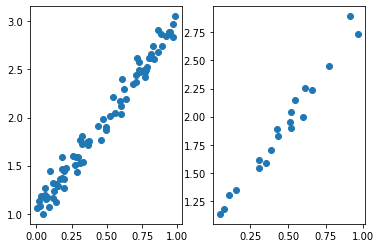

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows = 1, ncols = 2)
axs[0].scatter(x_train, y_train)  # plot the training dataset
axs[1].scatter(x_val, y_val)      # plot the validation dataset

### A simple linear regression model
Let's define a simple linear regression model to learn the values for two parameters `a` and `b` in the model above.

As you might see last week, a model can be constructed in Pytorch using the `torch.nn` class. To explicitly define the model, you need to implement (at least) the following methods:

- `__init__(self)`, which defines the components that make up the model. Here, you are not limited to defining parameters and other models (or layers in neural networks) as our model's attributes (see more about this later).
- `forward(self, x)`, which performs the actual computation, that is, it ouputs a prediction, given the input `x`. You need not call the `forward(x)` method, and should call the whole model itself to perform a forward pass and output predictions.

Out first model will look like this:

In [ ]:
import torch.nn as nn

class FirstModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.randn(1).float())
        self.b = nn.Parameter(torch.randn(1).float())
        
    def forward(self, x):
        return self.a + self.b * x

In the `__init__` method, we define two parameters, `a` and `b`, using the `Parameter()` class. By doing this, you can invoke the `parameters()` method of our model to retrieve an iterator over all model's parameters, that we can feed our optimiser. Moreover, we can get the current values for all parameters using the model's `state_dict()` method.

In the following, we will use stochastic gradient descent, i.e., the `SGD` method from `torch.optim` package, which takes two arguments: the iterator over the model's parameters (`model.parameters()`) and the learning rate `lr`.

In [ ]:
import torch.optim as optim
torch.manual_seed(42)

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f"The device used is: {device}\n")

# Now we can create a model
model = FirstModel().to(device)

# we can also inspect its parameters
print("Parameters before training: \n", model.state_dict())



The device used is: cuda:0

Parameters before training: 
 OrderedDict([('a', tensor([0.3367], device='cuda:0')), ('b', tensor([0.1288], device='cuda:0'))])


In [ ]:
# set learning rate
lr = 1e-1

# set number of epoches, i.e., number of times we iterate through the training set
epoches = 100

# We use mean square error (MSELoss)
loss_fn = nn.MSELoss(reduction='mean')

# We also use stochastic gradient descent (SGD) to update a and b
optimiser = optim.SGD(model.parameters(), lr=lr)

for epoch in range(epoches):
    model.train()             # set the model to training mode 
    optimiser.zero_grad()     # avoid accumulating gradients
    y_pred = model(x_train_tensor.to(device))
    loss = loss_fn(y_train_tensor.to(device), y_pred)
    loss.backward()           # calculate gradients
    optimiser.step()          # updates model's params

print("Parameters after training: \n", model.state_dict())

Parameters after training: 
 OrderedDict([('a', tensor([1.1552], device='cuda:0')), ('b', tensor([1.7113], device='cuda:0'))])


**When setting the number of epoches sufficiently large, you should be able to obtain some values for parameters `a` and `b` which are really close to their ground-truth values of 1 and 2. You can play with the model above by changing the number of epoches (`epoches`) and the learning rate (`lr`).**

### Nested model

In our model above, we manually created two parameters to perform a linear regression. We can also use Pytorch's `Linear` model as an attribute of our model, which results in a nested model. In the general case, Pytorch's linear model applies a linear transformation, of the form $y = xA^{T} + b$, to the input $x$. The values passed into the model indicate the size of $y$ and $x$ and therefore also dictate the size of $A$ and $b$. In our case both $x$ and $y$ are scalars therefore $A$ and $b$ are also scalars. 

To do this, we need to change the `__init__` method, where we create an attribute that contains our nested `Linear` model. Also in the `forward()`, we will simply call the nested model itself (`self.linear()`) to perform the forward pass.

Our new model will look like:


In [ ]:
class NewModel(nn.Module):

    def __init__(self):
        super().__init__()
        # a simple linear layer with a scalar input and a scalar output
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
new_model = NewModel().to(device) #Create an instance of the model
print(list(new_model.parameters()))

[Parameter containing:
tensor([[-0.2191]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.2018], device='cuda:0', requires_grad=True)]


You should see that the model has two parameters. The first one is the **weight** `b`, while the other one is the **bias** `a` in our linear model defined at the beginning (recall that $y=a + bx + \epsilon \cdot \mathcal{N}$). You can see this clearly when using the `state_dict()` method.

In [ ]:
print(new_model.state_dict())

OrderedDict([('linear.weight', tensor([[-0.2191]], device='cuda:0')), ('linear.bias', tensor([0.2018], device='cuda:0'))])


In [ ]:
# print the model
print(new_model)  

NewModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


Because we use SGD as our optimiser, so we need mini-batches (i.e., small subsets of our dataset) to feed the model. In Pytorch, we can use the `DataLoader` class to do this. We simply need to tell it which dataset (of `TensorDataset`) to use, the size of the mini-batch (or simply batch size). The loader is an iterator-like, which can loop over the dataset and fetch a adifferent mini-batch every time. By setting `shuffle=True` we ensure that the data is reshuffled at every epoch.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)

Let's see how we train the model now.

In [ ]:
# Now we can create a model
new_model = NewModel().to(device)

# we can also inspect its parameters
print("Parameters before training: \n", new_model.state_dict())

# set learning rate
lr = 1e-1

# set number of epoches, i.e., number of times we iterate through the training set
epoches = 100

# We use mean square error (MSELoss)
loss_fn = nn.MSELoss(reduction='mean')

# We also use stochastic gradient descent (SGD) to update a and b
optimiser = optim.SGD(new_model.parameters(), lr=lr)

Parameters before training: 
 OrderedDict([('linear.weight', tensor([[-0.4869]], device='cuda:0')), ('linear.bias', tensor([0.5873], device='cuda:0'))])


In [ ]:
for epoch in range(epoches):
    new_model.train() 
    for x_batch, y_batch in train_loader:
        # send tensors to device (cpu/cuda)
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        optimiser.zero_grad()
        y_pred = new_model(x_batch)
        loss = loss_fn(y_batch, y_pred)
        loss.backward()
        optimiser.step()

print("Parameters after training: \n", new_model.state_dict())

Parameters after training: 
 OrderedDict([('linear.weight', tensor([[1.9649]], device='cuda:0')), ('linear.bias', tensor([1.0185], device='cuda:0'))])


So far, we have defined an optimiser, a loss function and a (nested) model. We realise that if we use the code above, we have to modify it whenever we'd like to use a different optimiser or a different loss function. We might want to make our code more generic. How about writing a function that takes three arguments (optimiser, loss function and a model) and performs the training procedure. You will see below how to write a function in Python which returns another function.

In [ ]:
def generic_code(model, loss_fn, optimiser):

    # define a function inside another function
    def train_step(x_batch, y_batch):
        optimiser.zero_grad()
        y_pred = model(x_batch)   # forward pass
        loss = loss_fn(y_batch, y_pred)  # calculate loss value
        loss.backward()                # autograd
        optimiser.step()               # update parameters  
        return loss.item()             # return the loss

    # return the newly defined function
    return train_step                # return a function

The function `train_step()` changes based on what is input into the `generic_code()` function. In order to use this code we first have to call the `generic code()` function to create the function based on `model`, `loss_fn` and `optimiser`. We can then apply this function to some data to train the model. **You** can now perform the training process as usual:

In [ ]:
new_model = NewModel()
print("Parameters before training\n",new_model.state_dict(),"\n")

# set learning rate
lr = 1e-1

# set number of epoches, i.e., number of times we iterate through the training set
epoches = 100

# We use mean square error (MSELoss)
loss_fn = nn.MSELoss(reduction='mean')

# We also use stochastic gradient descent (SGD) to update a and b
optimiser = optim.SGD(new_model.parameters(), lr=lr)

# after this step, train_step is actually a FUNCTION, which takes x_train_tensor 
# y_train_tensor as inputs and return the loss value
train_step = generic_code(new_model, loss_fn, optimiser)

# list to record the loss over training course
losses = list()

for epoch in range(epoches):
    for x_batch, y_batch in train_loader:
        losses.append(train_step(x_batch, y_batch))

print("Parameters after training \n",new_model.state_dict())

Parameters before training
 OrderedDict([('linear.weight', tensor([[-0.5083]])), ('linear.bias', tensor([0.3116]))]) 

Parameters after training 
 OrderedDict([('linear.weight', tensor([[1.9687]])), ('linear.bias', tensor([1.0239]))])


You can now plot the loss value over time as follows:

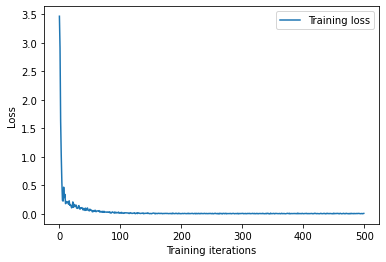

In [ ]:
plt.plot(range(len(losses)), losses, label="Training loss")
plt.xlabel("Training iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Evaluation

We have not used the validation set that we created at the beginning of the tutorial. We have split the dataset of 100 points into a training set (80%) and a validation set (20%). We now change our model to include the evaluation phase, that is, computing the validation loss. Intuitively speaking, since we do not use the validation set when training the model, so the validation set is actually *unseen* to our model, and turns out to be a good choice to inspect how well our model performs on unseen data (i.e., making predictions). 





We first need to create a DataLoader for the validation set.

In [ ]:
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

Our training loop should look like this:

OrderedDict([('linear.weight', tensor([[-0.4921]], device='cuda:0')), ('linear.bias', tensor([0.1923], device='cuda:0'))])
OrderedDict([('linear.weight', tensor([[1.6197]], device='cuda:0')), ('linear.bias', tensor([1.1970], device='cuda:0'))])


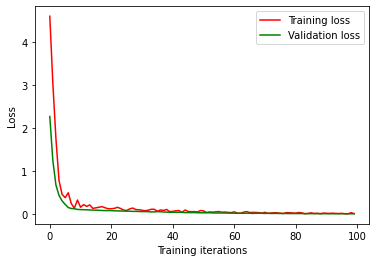

In [ ]:
new_model = NewModel().to(device)
print(new_model.state_dict())

lr = 1e-1
epoches = 20
loss_fn = nn.MSELoss()
optimiser = optim.SGD(new_model.parameters(), lr=lr)

losses = list()
val_losses = list()
train_step = generic_code(new_model, loss_fn, optimiser)

for epoch in range(epoches):
    new_model.train()
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        losses.append(train_step(x_batch, y_batch))
        
        with torch.no_grad():       # fix the model's params (reduces cost)
            for x_val, y_val in val_loader:
                x_val = x_val.to(device)
                y_val = y_val.to(device)
                new_model.eval()    # set model to evaluation mode
                y_pred = new_model(x_val)
                val_loss = loss_fn(y_val, y_pred)
                val_losses.append(val_loss.item())

print(new_model.state_dict())
plt.plot(range(len(losses)), losses,'r', label="Training loss")
plt.plot(range(len(val_losses)), val_losses,'g', label="Validation loss")
plt.xlabel("Training iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Given the learning rate in `np.linspace(0.01, 0.5, 50)`. Could you plot a graph showing how the validation loss changes according to different values of the learning rate? Please use a number of epoches of at most, e.g., 200 for reasonable runtime.

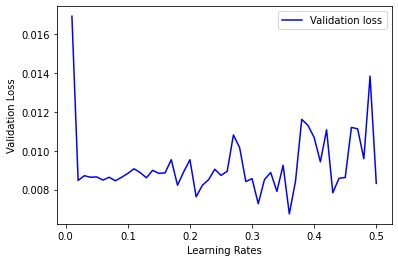

In [ ]:
new_model = NewModel().to(device)
lrs = np.linspace(0.01, 0.5, 50)

epoches = 200
loss_fn = nn.MSELoss()

losses = list()

for lr in lrs:
    val_losses = list()
    optimiser = optim.SGD(new_model.parameters(), lr=lr)
    train_step = generic_code(new_model, loss_fn, optimiser)
    for epoch in range(epoches):
      new_model.train()
      for x_batch, y_batch in train_loader:
          x_batch = x_batch.to(device)
          y_batch = y_batch.to(device)
          train_step(x_batch, y_batch)
    with torch.no_grad():
      for x_val, y_val in val_loader:
        x_val = x_val.to(device)
        y_val = y_val.to(device)
        new_model.eval()
        y_pred = new_model(x_val)
        val_loss = loss_fn(y_val, y_pred)
        val_losses.append(val_loss.item())
        losses.append(np.mean(val_losses))
plt.plot(lrs, losses,'b', label="Validation loss")
plt.xlabel("Learning Rates")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

## Neural Networks for data classfication

In previous sections, you should have learnt how to use Python and Pytorch to do gradient descent and optimisation. In this section, we will introduce how to build and use a network for data classfication. By the end of this tutorial, you will know:

- How to create a spiral dataset for classification 
- How to train a softmax classifier
- What is a multilayer perceptron network
- What is regularisation
- How to train a neural network with pytorch

### Generating Data
We will genearte some data to for the following test.
Note that the content below are mostly borrowed from [cs231n](https://cs231n.github.io/neural-networks-case-study/)

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

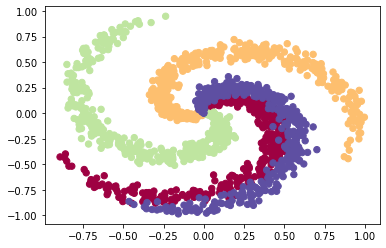

In [ ]:
N = 400 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

The toy spiral data consists of three classes (blue, red, yellow) that are not linearly separable. It should be noted that the purle and red arms of the spiral are very close together, we would expect these arms to be particularly hard to seperate. 

### Train a network in Pytorch

Following the previous section, we


1.   First define a model and choose a proper classificaiton function
2.   Compute the initial classification loss
3.   Iteratively update the model parameters
4.   Evaluate the accuracy



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Now we define a 3 layers network like this.


In [ ]:
class class_data(nn.Module):
    def __init__(self):
        super(class_data, self).__init__()

        self.lin1 = torch.nn.Linear(2, 100) 
        self.lin2 = torch.nn.Linear(100, 100)
        self.lin3 = torch.nn.Linear(100, 4)

    def forward(self, x):
  
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)
        x = self.lin3(x)      
   
        return x

In [ ]:
#Prepare Training Data
#X1 denotes the training examples
#labels denote the groud truth with repsect to X1
X1 = torch.Tensor(X)
data_size = X1.shape[0]
X1 = X1.unsqueeze(0)
labels = y
labels = torch.Tensor(labels)
labels = labels.unsqueeze(0)


# Choose a proper classification function
# As we have 4 classes here, CrossEntropyloss will suit for this problem.
loss_fn = nn.CrossEntropyLoss()
classifier = class_data() 
optimizer = optim.SGD(classifier.parameters(), lr =0.01, momentum=0.9)
batchsize = 1600

for i in range(1000):
    choice = np.random.choice(data_size, batchsize, replace=False)
    X_ = X1[0,choice,:]
    labels_ =  labels[0,choice]
    output = classifier(X_)
    loss = loss_fn(output, labels_.long())    
    optimizer.zero_grad()
    loss.backward()
    if i %100==0:
        print(loss)
    optimizer.step()

print('Training done')
preds = output.max(1)[1]

tensor(1.3831, grad_fn=<NllLossBackward>)
tensor(1.0336, grad_fn=<NllLossBackward>)
tensor(0.9589, grad_fn=<NllLossBackward>)
tensor(0.8766, grad_fn=<NllLossBackward>)
tensor(0.7701, grad_fn=<NllLossBackward>)
tensor(0.6554, grad_fn=<NllLossBackward>)
tensor(0.5584, grad_fn=<NllLossBackward>)
tensor(0.4822, grad_fn=<NllLossBackward>)
tensor(0.4210, grad_fn=<NllLossBackward>)
tensor(0.3708, grad_fn=<NllLossBackward>)
Training done


Below we visualise how well the neural network has learnt the training data. Normally if we were testing the performance of a neural network we would use a validation set in order to to assess generalisation, however in this case we are only assessing how well the neural network has learnt the training data.

training accuracy:  0.8925


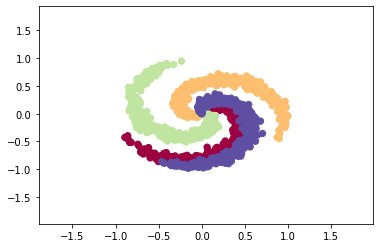

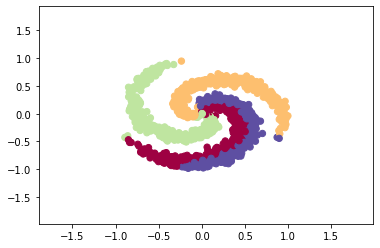

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

## ground truth show
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## prediction show
fig = plt.figure()

plt.scatter(X[choice, 0], X[choice, 1], c=preds.numpy(), s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())



## The accuracy

predicted_results = preds.numpy()
ground_truth = y[choice]

acc = np.mean(predicted_results==ground_truth)

print ('training accuracy: ', acc)



We can see that the network classifies the majority points correctly. Some of the extreme values however are misclassified, for example at the end of each of the arms of the spiral there are misclassifications. There is also some misclassification at the boundary between the red and purple arms caused by the fact that these classes overlap. We can use the below code to get a better idea of the decision boundaries which the neural network learns. The circles whose colour is different to that of the background colour are misclassified.  

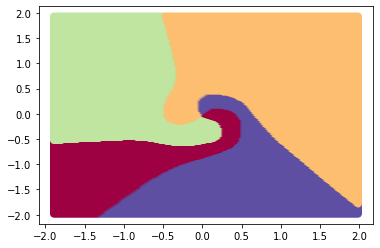

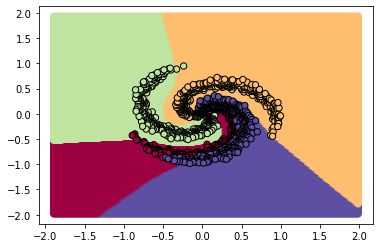

In [ ]:
#concatenating the meshgrid
xx = np.expand_dims(xx.flatten(), axis = 1)
yy = np.expand_dims(yy.flatten(), axis = 1)
val = np.concatenate((xx,yy),axis = 1)

#Converting the input to a tensor which the network will recognise
val = torch.from_numpy(val)
val = val.to(torch.float32)

#Calculating the label at each point of the meshgrid
probs = classifier(val)
seg = torch.argmax(probs,dim=1)

#Visualising the results
plt.figure()
plt.scatter(xx, yy, c=seg.numpy(), s=40, cmap=plt.cm.Spectral)
plt.figure()
plt.scatter(xx, yy, c=seg.numpy(), s=40, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
